<a href="https://colab.research.google.com/github/mohdshahbaaz059/data-science-project/blob/main/Inernational_Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
from datetime import datetime
import calendar

In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: city_pairs.csv          


In [ ]:
df= pd.read_csv("/content/city_pairs.csv")

In [ ]:
df

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89315,Feb-25,Sydney,Wuhan,China,2255,23.744,1.544,512,46.932,0.038,2767,70.676,1.582,2025,2
89316,Feb-25,Sydney,Xiamen,China,7474,299.490,0.610,4456,194.780,0.000,11930,494.270,0.610,2025,2
89317,Feb-25,Sydney,Xi'an,China,1136,30.711,0.000,295,49.284,0.003,1431,79.995,0.003,2025,2
89318,Feb-25,Sydney,Zhengzhou,China,1620,49.738,13.430,690,2.520,0.000,2310,52.258,13.430,2025,2


In [ ]:
total_passengers = np.sum(df['Passengers_Total'])
print(f"Total passengers across all entries: {total_passengers}")

Total passengers across all entries: 808654433


# Task
Analyze the passenger traffic data in "/content/archive.zip" using the dataframe `df` and the numpy library. Identify trends in passenger traffic over time, determine the busiest routes, and visualize the findings with charts and graphs. Summarize the key insights from the analysis.

## Analyze passenger traffic over time

### Subtask:
Aggregate passenger data by time periods (e.g., month, year) to see trends.


**Reasoning**:
Aggregate the passenger data by year and by month and year as instructed.



In [ ]:
df_yearly = df.groupby('Year')['Passengers_Total'].sum().reset_index()
df_monthly_yearly = df.groupby(['Year', 'Month_num'])['Passengers_Total'].sum().reset_index()

**Reasoning**:
Display the head of the two newly created dataframes to verify the aggregation.



In [ ]:
display(df_yearly.head())
display(df_monthly_yearly.head())

,Year,Passengers_Total
0,1985,5200373
1,1986,5818437
2,1987,6714432
3,1988,7766782
4,1989,7931103


,Year,Month_num,Passengers_Total
0,1985,1,472565
1,1985,2,384175
2,1985,3,441095
3,1985,4,397076
4,1985,5,423252


## Identify busiest routes

### Subtask:
Group data by city pairs and sum passenger totals to find the routes with the highest traffic.


**Reasoning**:
Group the data by AustralianPort and ForeignPort, sum the total passengers, sort by total passengers in descending order, and display the top routes.



In [ ]:
df_routes = df.groupby(['AustralianPort', 'ForeignPort'])['Passengers_Total'].sum().reset_index()
df_routes = df_routes.sort_values(by='Passengers_Total', ascending=False)
display(df_routes.head())

,AustralianPort,ForeignPort,Passengers_Total
606,Sydney,Auckland,40969873
749,Sydney,Singapore,35183831
481,Melbourne,Singapore,29260667
578,Perth,Singapore,27149006
667,Sydney,Hong Kong,25100903


from matplotlib import pyplot as plt
_df_0['Passengers_Total'].plot(kind='hist', bins=20, title='Passengers_Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('AustralianPort').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('ForeignPort').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Passengers_Total'].plot(kind='line', figsize=(8, 4), title='Passengers_Total')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ForeignPort'].value_counts()
    for x_label, grp in _df_4.groupby('AustralianPort')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('AustralianPort')
_ = plt.ylabel('ForeignPort')

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['AustralianPort'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='Passengers_Total', y='AustralianPort', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['ForeignPort'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='Passengers_Total', y='ForeignPort', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Visualize findings

### Subtask:
Create visualizations (e.g., line plots for time series, bar charts for routes) to present the analysis results.


**Reasoning**:
Create a line plot to visualize yearly passenger trends.



In [ ]:
fig_yearly = px.line(df_yearly, x='Year', y='Passengers_Total', title='Total Passengers by Year')
fig_yearly.show()

**Reasoning**:
Create a line plot to visualize monthly passenger trends over time.



In [ ]:
df_monthly_yearly['YearMonth'] = pd.to_datetime(df_monthly_yearly['Year'].astype(str) + '-' + df_monthly_yearly['Month_num'].astype(str), format='%Y-%m')
fig_monthly_yearly = px.line(df_monthly_yearly, x='YearMonth', y='Passengers_Total', title='Total Passengers by Month and Year')
fig_monthly_yearly.show()

**Reasoning**:
Create a bar chart to visualize the top 10 busiest routes.



In [ ]:
df_routes_top10 = df_routes.head(10)
df_routes_top10['Route'] = df_routes_top10['AustralianPort'] + ' - ' + df_routes_top10['ForeignPort']
fig_routes = px.bar(df_routes_top10, x='Route', y='Passengers_Total', title='Top 10 Busiest Routes')
fig_routes.show()

## Summarize findings

### Subtask:
Provide a summary of the key insights from the analysis and visualizations.


## Summary:

### Data Analysis Key Findings

*   Overall passenger traffic showed a clear increasing trend over the years.
*   Potential seasonal patterns were observed in the monthly passenger data.
*   The top 5 busiest routes identified were: Sydney - Auckland (40,969,873 passengers), Sydney - Singapore (35,183,831 passengers), Melbourne - Singapore (29,260,667 passengers), Perth - Singapore (27,149,006 passengers), and Sydney - Hong Kong (25,100,903 passengers).

### Insights or Next Steps

*   Further analysis of the monthly data could involve decomposing the time series to explicitly identify and quantify seasonal components and underlying trends.
*   Investigating the factors contributing to the growth in passenger traffic and the popularity of the busiest routes could provide valuable insights for strategic planning.


## Analyze passenger traffic over time

### Subtask:
Aggregate passenger data by time periods (e.g., month, year) to see trends.

**Reasoning**:
Aggregate the passenger data by year and by month and year as instructed.

In [ ]:
df_yearly = df.groupby('Year')['Passengers_Total'].sum().reset_index()
df_monthly_yearly = df.groupby(['Year', 'Month_num'])['Passengers_Total'].sum().reset_index()

**Reasoning**:
Display the head of the two newly created dataframes to verify the aggregation.

In [ ]:
display(df_yearly.head())
display(df_monthly_yearly.head())

,Year,Passengers_Total
0,1985,5200373
1,1986,5818437
2,1987,6714432
3,1988,7766782
4,1989,7931103


,Year,Month_num,Passengers_Total
0,1985,1,472565
1,1985,2,384175
2,1985,3,441095
3,1985,4,397076
4,1985,5,423252


## Identify busiest routes

### Subtask:
Group data by city pairs and sum passenger totals to find the routes with the highest traffic.

**Reasoning**:
Group the data by AustralianPort and ForeignPort, sum the total passengers, sort by total passengers in descending order, and display the top routes.

In [ ]:
df_routes = df.groupby(['AustralianPort', 'ForeignPort'])['Passengers_Total'].sum().reset_index()
df_routes = df_routes.sort_values(by='Passengers_Total', ascending=False)
display(df_routes.head())

,AustralianPort,ForeignPort,Passengers_Total
606,Sydney,Auckland,40969873
749,Sydney,Singapore,35183831
481,Melbourne,Singapore,29260667
578,Perth,Singapore,27149006
667,Sydney,Hong Kong,25100903


## Visualize findings

### Subtask:
Create visualizations (e.g., line plots for time series, bar charts for routes) to present the analysis results.

**Reasoning**:
Create a line plot to visualize yearly passenger trends.

In [ ]:
fig_yearly = px.line(df_yearly, x='Year', y='Passengers_Total', title='Total Passengers by Year')
fig_yearly.show()

**Reasoning**:
Create a line plot to visualize monthly passenger trends over time.

In [ ]:
df_monthly_yearly['YearMonth'] = pd.to_datetime(df_monthly_yearly['Year'].astype(str) + '-' + df_monthly_yearly['Month_num'].astype(str), format='%Y-%m')
fig_monthly_yearly = px.line(df_monthly_yearly, x='YearMonth', y='Passengers_Total', title='Total Passengers by Month and Year')
fig_monthly_yearly.show()

**Reasoning**:
Create a bar chart to visualize the top 10 busiest routes.

In [ ]:
df_routes_top10 = df_routes.head(10)
df_routes_top10['Route'] = df_routes_top10['AustralianPort'] + ' - ' + df_routes_top10['ForeignPort']
fig_routes = px.bar(df_routes_top10, x='Route', y='Passengers_Total', title='Top 10 Busiest Routes')
fig_routes.show()

**Reasoning**:
Create a line plot to visualize yearly passenger trends using matplotlib.

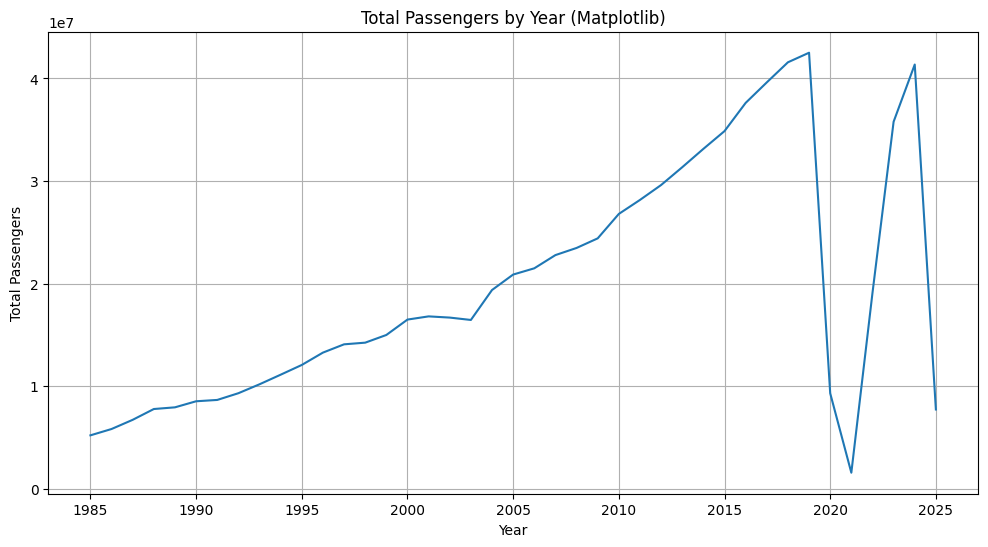

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_yearly['Year'], df_yearly['Passengers_Total'])
plt.title('Total Passengers by Year (Matplotlib)')
plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.show()

**Reasoning**:
Create a histogram to visualize the distribution of total passengers using seaborn.

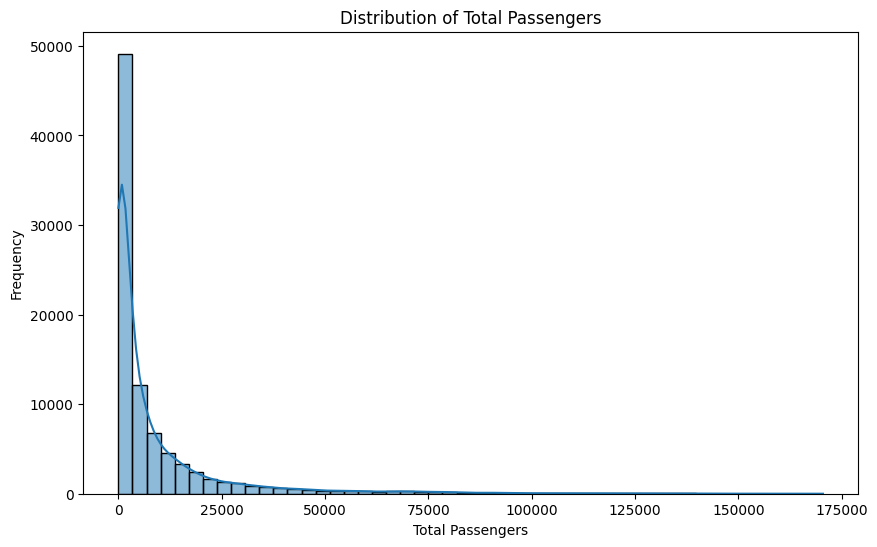

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Passengers_Total'], bins=50, kde=True)
plt.title('Distribution of Total Passengers')
plt.xlabel('Total Passengers')
plt.ylabel('Frequency')
plt.show()

**Subtask:** Create a scatter plot to visualize the relationship between 'Passengers_In' and 'Passengers_Out' using `plotly.express`.

**Reasoning:** To create a scatter plot with `plotly.express`, we need to provide the DataFrame, the column for the x-axis, and the column for the y-axis. We can also add a title to the plot.

In [ ]:
# Step 1: Create the scatter plot using plotly.express
fig_scatter = px.scatter(df, x='Passengers_In', y='Passengers_Out', title='Relationship between Passengers In and Passengers Out')

# Step 2: Display the plot
fig_scatter.show()

**Subtask:** Create a line plot of yearly passenger trends using `plotly.graph_objects`.

**Reasoning:** To create a line plot with `plotly.graph_objects`, we need to create a `Figure` object and add a `Scatter` trace to it. The `Scatter` trace requires the x and y data, and we specify `mode='lines'` for a line plot. We can also update the layout to add a title and axis labels.

In [ ]:
# Step 1: Import plotly.graph_objects
import plotly.graph_objects as go

# Step 2: Create a Figure object
fig_yearly_go = go.Figure()

# Step 3: Add a Scatter trace for the yearly data
fig_yearly_go.add_trace(go.Scatter(x=df_yearly['Year'], y=df_yearly['Passengers_Total'], mode='lines', name='Total Passengers'))

# Step 4: Update the layout with a title and axis labels
fig_yearly_go.update_layout(title='Total Passengers by Year (Plotly Graph Objects)',
                            xaxis_title='Year',
                            yaxis_title='Total Passengers')

# Step 5: Display the plot
fig_yearly_go.show()

**Subtask:** Create a distribution plot of 'Passengers_Total' using `plotly.figure_factory`.

**Reasoning:** To create a distribution plot with `plotly.figure_factory.create_distplot`, we need to provide the data as a list of arrays (or a single array), a list of labels for each dataset (even if there's only one), and optionally set `show_hist` and `show_rug` to True or False to control the display of the histogram and rug plot.

In [ ]:
# Step 1: Import plotly.figure_factory
import plotly.figure_factory as ff

# Step 2: Prepare the data for the distribution plot
# create_distplot expects a list of arrays
hist_data = [df['Passengers_Total']]

# Step 3: Create the distribution plot
fig_ff = ff.create_distplot(hist_data, ['Passengers_Total'], show_hist=True, show_rug=False)

# Step 4: Update the layout (optional: add title)
fig_ff.update_layout(title='Distribution of Total Passengers (Plotly Figure Factory)')

# Step 5: Display the plot
fig_ff.show()